# Random Forest Classification

In [120]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing the libraries

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Importing the dataset

In [122]:
# load the dataset 
dataset = pd.read_csv('H:\ML\Project\Diabetes\DiaBD_A Diabetes Dataset for Enhanced Risk Analysis and Research in Bangladesh.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\hasin\AppData\Local\Temp\ipykernel_19428\2257195792.py:2: SyntaxWarning: invalid escape sequence '\M'
  dataset = pd.read_csv('H:\ML\Project\Diabetes\DiaBD_A Diabetes Dataset for Enhanced Risk Analysis and Research in Bangladesh.csv')


## Train Test Split



In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Data Exploration


In [124]:
#finding the missing values
Train_df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

## Encoding Categorical Data (Independent Variables)


<Axes: >

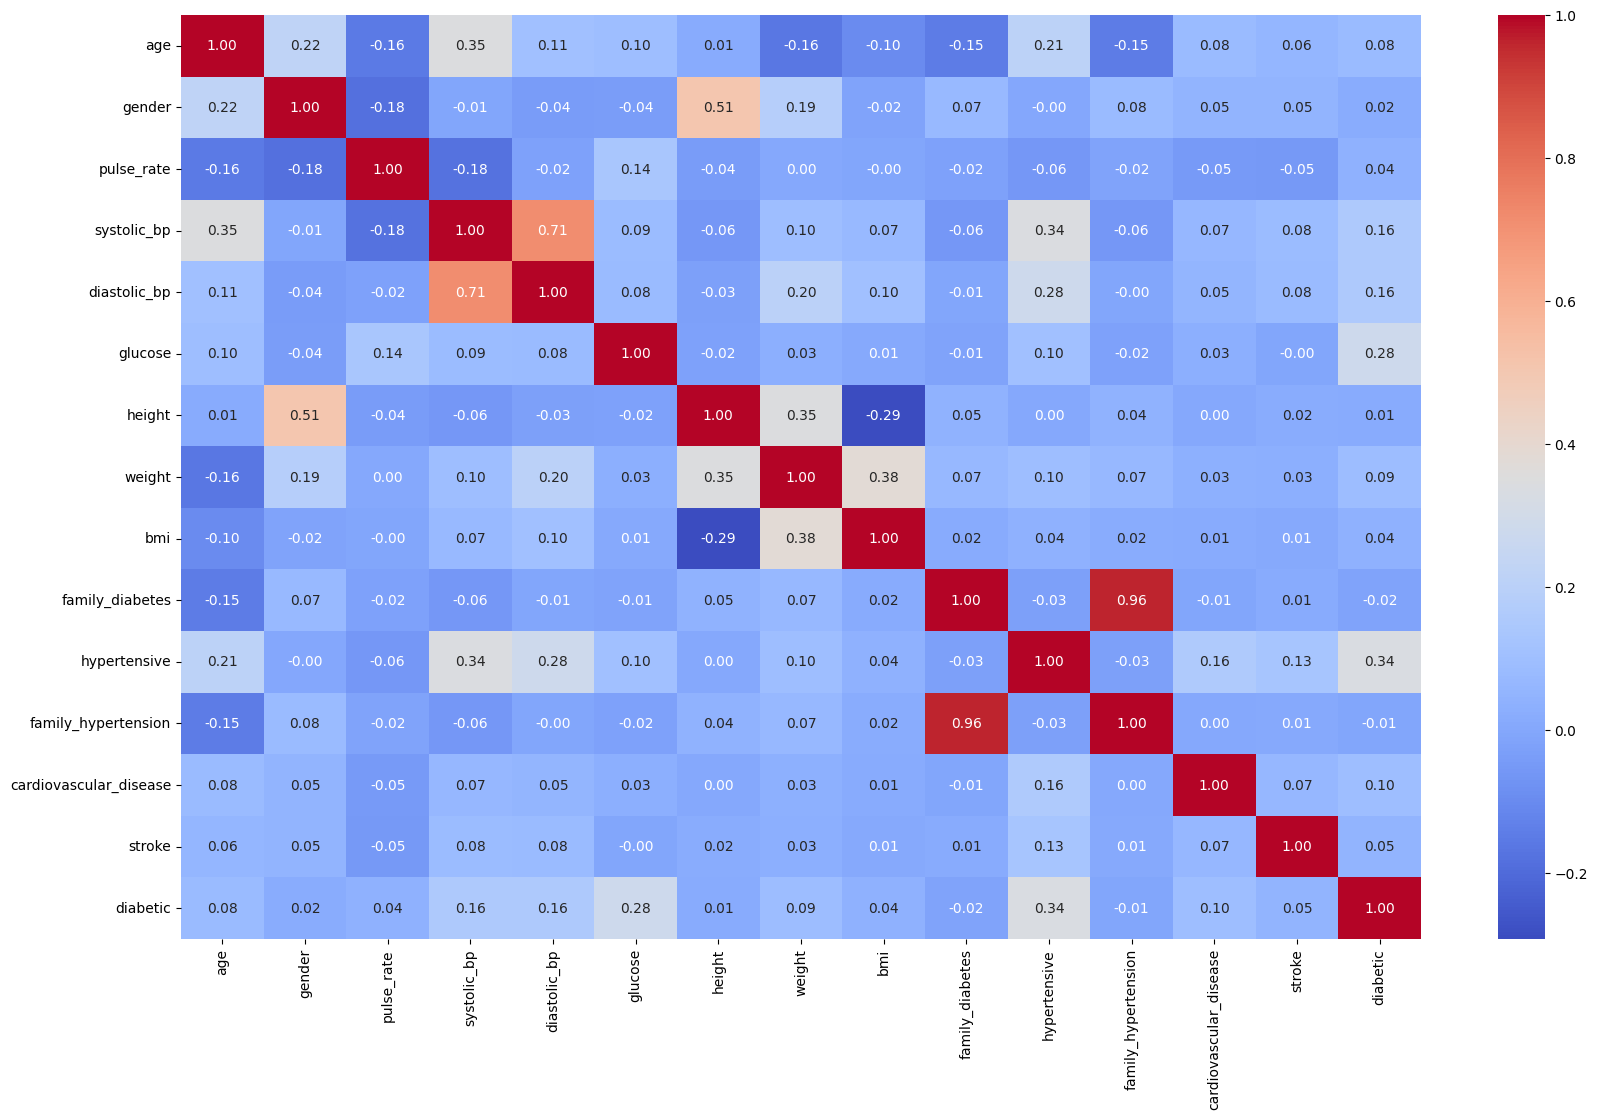

In [125]:
correlation_matrix = Train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot= True, cmap= 'coolwarm', fmt='0.2f')

In [126]:
# Display columns with object data type
object_columns = Train_df.select_dtypes(include=['object']).columns
print(object_columns)

Index([], dtype='object')


In [127]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3966 entries, 3421 to 1289
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3966 non-null   float64
 1   gender                  3966 non-null   float64
 2   pulse_rate              3966 non-null   float64
 3   systolic_bp             3966 non-null   float64
 4   diastolic_bp            3966 non-null   float64
 5   glucose                 3966 non-null   float64
 6   height                  3966 non-null   float64
 7   weight                  3966 non-null   float64
 8   bmi                     3966 non-null   float64
 9   family_diabetes         3966 non-null   float64
 10  hypertensive            3966 non-null   float64
 11  family_hypertension     3966 non-null   float64
 12  cardiovascular_disease  3966 non-null   float64
 13  stroke                  3966 non-null   float64
 14  diabetic                3966 non-null   fl

## Encoding Categorical Data

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

Train_df[['gender', 'diabetic']] = ordinal_encoder.fit_transform(Train_df[['gender', 'diabetic']])
Test_df[['gender', 'diabetic']] = ordinal_encoder.fit_transform(Test_df[['gender', 'diabetic']])

In [129]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3966 entries, 3421 to 1289
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3966 non-null   float64
 1   gender                  3966 non-null   float64
 2   pulse_rate              3966 non-null   float64
 3   systolic_bp             3966 non-null   float64
 4   diastolic_bp            3966 non-null   float64
 5   glucose                 3966 non-null   float64
 6   height                  3966 non-null   float64
 7   weight                  3966 non-null   float64
 8   bmi                     3966 non-null   float64
 9   family_diabetes         3966 non-null   float64
 10  hypertensive            3966 non-null   float64
 11  family_hypertension     3966 non-null   float64
 12  cardiovascular_disease  3966 non-null   float64
 13  stroke                  3966 non-null   float64
 14  diabetic                3966 non-null   fl

In [130]:

print(Train_df.head())

           age  gender  pulse_rate  systolic_bp  diastolic_bp   glucose  \
3421 -0.795228     1.0   -0.622701    -1.897173     -2.497337 -0.899287   
3535 -0.046783     1.0   -0.952128     0.169134     -0.025434 -0.110911   
387   0.477129     0.0   -0.622701     0.663251     -0.025434  0.124928   
2541 -0.046783     0.0    0.695007    -0.908939     -0.025434  0.785277   
3297 -1.169450     0.0    1.024434    -0.280063      0.771955 -0.050267   

        height    weight       bmi  family_diabetes  hypertensive  \
3421  1.648757 -0.254264 -0.442518        -0.180398     -0.353704   
3535  0.639696 -0.304305 -0.279872        -0.180398     -0.353704   
387  -1.252295 -1.655416 -0.494316        -0.180398     -0.353704   
2541 -0.621631 -1.435235 -0.515035        -0.180398     -0.353704   
3297 -0.369366  1.146889  0.576865        -0.180398     -0.353704   

      family_hypertension  cardiovascular_disease    stroke  diabetic  
3421             -0.18772               -0.110685 -0.063645   

## Splitting the dataset into the Training set and Test set

In [131]:
X_train = Train_df.drop(columns=['diabetic']).values
y_train = Train_df['diabetic'].values
X_test = Test_df.drop(columns=['diabetic']).values
y_test =Test_df['diabetic'].values

## Feature Scaling

In [132]:
scale = StandardScaler()
columns = Train_df.select_dtypes(include=['number']).columns.difference(['gender', 'diabetic'])
Train_df[columns] = scale.fit_transform(Train_df[columns])


##  Random Forest Classification 

In [133]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1225    0]
 [  97    0]]


0.926626323751891

## Kernel SVM

In [134]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_SVM = classifier.predict(X_test)
accuracy_score(y_test, y_pred_SVM)

0.926626323751891

## KNN



In [135]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred_KNN = classifier.predict(X_test)
accuracy_score(y_test, y_pred_KNN)

0.9024205748865356